# Project Description

This project aims to prepare a report for the bank's credit department. In this case, the data is needed to determine the effect of marital status and the number of children that belongs to the family on the possibility of paying the loan on time.

This report will affect the credit assessment for prospective of the bank to the customers as one of the factors to evaluate the ability of prospective them to repay their loans.

# First Step

We will open the data and see all the info of the dataset.

In [1]:
import pandas as pd

#import the dataset
credit_scoring = pd.read_csv('/content/credit_scoring_eng.csv')

#show table
credit_scoring

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


In [2]:
credit_scoring.shape

(21525, 12)

**Data Exploration**

The data has 21,525 entries and 12 colums. The columns are:
1. `children` - the number of children in the family
2. `days_employed` - the number of work experience in days
3. `dob_years` - the number of customers' age
4. `education` - the level of customers' education
5. `education_id` - as an identification of customers' education
6. `family_status` - the martial status of the customers'
7. `family_status_id` - as an identification of customers' family status
8. `gender` - customers' gender
9. `income_type` - the customers' job
10. `debt` - is the customers have debt or not?
11. `total_income` - the amount of their income
12. `purpose` - the reason why they take the loan

In [3]:
#the type of dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


From this information, it can be seen that the `days_employed` and `total_income` columns have different values from the whole dataset. The entire dataset has 21,525 entries while both columns have a total of 19,351 entries. So, it can be concluded that there is missing data in both columns.

Both of the colums has the same amount of missing data. We have to see, if the missing data are symetrical or not. One of the way is to see amount of missing data from each column.

In [4]:
#missing data from 'days_employed'
days_employed_missing = credit_scoring.loc[credit_scoring['days_employed'].isna()]
days_employed_missing.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
#missing data from 'total_income'
total_income_missing = credit_scoring.loc[credit_scoring['total_income'].isna()]
total_income_missing.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [6]:
#missing data from both columns
credit_scoring.loc[(credit_scoring['days_employed'].isna()) & credit_scoring['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate


**Tentative conclusions**

The missing data in the `days_employed` and `total_income` columns have the same value of missing data, which is 2,174 data even in the filtered one. This can be conclude that missing data is symetrical. The data that is missing in `days_employed` is also missing in `total_income`. Before we can analyze the data further, we have to clean the data first.

In [7]:
#how many the data was missing?
percentage_null = round((credit_scoring['days_employed'].isna().sum() / len(credit_scoring)) * 100, 2)
print(percentage_null)

10.1


The percentage of missing data in the `credit_scoring` dataset is 10.1%. The missing data is large enough that it is necessary to fill the missing data. The section can be filled with the average or median, depending on the datas.

The causes of empty data can be several things, including errors in inputting data or the absence of mandatory or obligations in filling in the number of days of employed and total income.

# Data Transformation

From the dataset, we can see that there's several things that we need to transform. We can describe it by columns.

**Children**

Berfore we transform the data in `children` column, we have to see the values in the column.

In [8]:
credit_scoring['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

There are two main things that wierd in the data. One is (-1) and the second is 20. There won't be any family that has amount of children -1 and there is highly unlikely, nowadays, that a family has 20 children. it is very possible to make a typo in entering data. So, it more make sense that the -1 is 1 and 20 is 2. 

In [9]:
#transforming the data in 'children'
credit_scoring['children'] = credit_scoring['children'].replace([-1], 1)
credit_scoring['children'] = credit_scoring['children'].replace([20], 2)

#see if the amount is changed
credit_scoring['children'].value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

**Days Employed**

As we seen before, there are some values that negatives in the columns. It doesn't make any sense because there won't be any amount of work experience that negative.

In [10]:
#amounts of odd data
days_null = len(credit_scoring.loc[credit_scoring['days_employed'] < 0])
percentage_days_null = days_null / len(credit_scoring) * 100
print (round(percentage_days_null, 2))

73.9


Data from the `days_employed` column as much as 73.9% odd datas that has negative values. This value could be due to an error in inputting data. So that it can be solved with the `abs()` method. In addition, the `days_employed` data shows that the number of work experience in days is not a round value, so it can be rounded up using the `round` method. Because there will be hard to analyze if the days don't have round value.

In [11]:
credit_scoring['days_employed'] = round(credit_scoring['days_employed'].abs())
credit_scoring['days_employed'].value_counts()

200.0       15
206.0       14
1482.0      14
220.0       14
234.0       13
            ..
400110.0     1
4788.0       1
893.0        1
360439.0     1
343937.0     1
Name: days_employed, Length: 9058, dtype: int64

The amount of the days in `days_employed` has a lot of variety. It can be much easier if the days is converted to years. The values can be saved in `years_employed` column.

In [12]:
#converting days to years
credit_scoring['years_employed'] = round(credit_scoring['days_employed'] / 365, 2)

In [13]:
#check the column
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.12
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.03
2,0,5623.0,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,15.41
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.30
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.24


After checking the column, there was an odd value at 4th entry. The amount of `years_employed` is more than the customer's age and also it doesn't make sense that if the customers' work since they were born. 

The classification in the US for productive age is 15 - 64 years. Thus, the youngest age for a person to work is 15 years.

In [14]:
#calculate the maximum working years
credit_scoring ['max_working_years'] = credit_scoring['dob_years'] - 15

In [15]:
#check the column
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.12,27
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.03,21
2,0,5623.0,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,15.41,18
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.30,17
4,0,340266.0,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,932.24,38


In [16]:
#check the amount of values that doesn't make sense
credit_scoring.loc[credit_scoring['years_employed'] > credit_scoring['max_working_years']].shape

(3563, 14)

We can drop the data that doesn't make sense. This is because there is no clue that the data was typo or there was error in data input.

In [17]:
#drop the data
credit_scoring.drop(credit_scoring.loc[credit_scoring['years_employed'] > credit_scoring['max_working_years']].index, inplace=True)

In [18]:
#check the data
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.12,27
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.03,21
2,0,5623.0,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,15.41,18
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.30,17
5,0,926.0,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.54,12


**DOB Years**

The next transformation is for the `dob_years` column. The first step should be to look at the value of each category and see if there are any odd or unreasonable values.

In [19]:
credit_scoring['dob_years'].value_counts()

35    614
41    601
40    601
34    600
42    586
38    586
33    578
39    568
31    558
36    549
29    544
30    540
44    535
37    530
48    517
32    507
43    504
28    502
27    489
45    486
49    478
47    463
46    458
50    451
26    405
52    389
51    373
25    356
53    353
54    334
56    302
55    280
24    263
23    254
58    253
57    248
59    189
22    182
61    139
60    133
62    117
21    111
64     86
63     77
65     58
20     51
66     44
67     35
68     19
19     14
69     11
70     11
71     10
0      10
72      5
74      2
73      2
75      1
Name: dob_years, dtype: int64

In [20]:
#how many data that missing
years_null = len(credit_scoring.loc[credit_scoring['dob_years'] == 0])
percentage_years_null = years_null / len(credit_scoring) * 100
print (round(percentage_years_null, 2))

0.06


In [21]:
print(years_null)

10


From the data above, it can be seen that in the `dob_years` column has a value of 0. Logically, if a person is only 0 years old, he cannot apply for a loan to the bank. This value was only 0.06% of the dataset. It can be replace by the median or the mean.

The value of the median or mean from `dob_years` should be obtained from the clean dataset. 

In [22]:
#cleaning the 'dob_years' column
dob_years_clean = credit_scoring.loc[credit_scoring['dob_years'] != 0]
dob_years_clean

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years
0,1,8438.0,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,23.12,27
1,1,4025.0,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,11.03,21
2,0,5623.0,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,15.41,18
3,3,4125.0,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,11.30,17
5,0,926.0,27,bachelor's degree,0,civil partnership,1,M,business,0,40922.170,purchase of the house,2.54,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21519,1,2351.0,37,graduate degree,4,divorced,3,M,employee,0,18551.846,buy commercial real estate,6.44,22
21520,1,4529.0,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,12.41,28
21522,1,2113.0,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,5.79,23
21523,3,3112.0,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,8.53,23


The desicion to change the value by median or mean of the data, can be seen with boxplot. If the data has outlier, it's save to replace the missing value by median and vice versa. 

In [23]:
#importing library for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


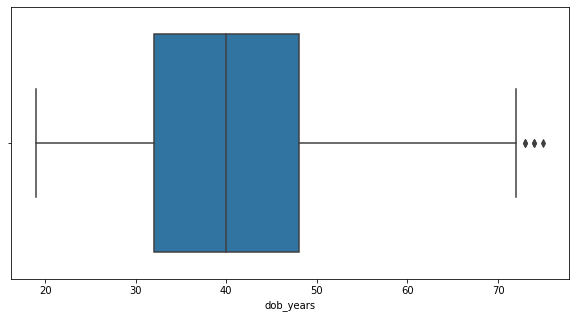

In [24]:
#boxplot for `dob_years` column
plt.figure(figsize=(10,5))
sns.boxplot(dob_years_clean['dob_years']);

As the graph show, there is some outlier in the data. The data is considered as outlier if the customer's age is more than 70. So, it can be concluded that the missing value can be replace with median of the data. 

In [25]:
#median value of the data
med_age_years = round(credit_scoring['dob_years'].median(), 0)
print (med_age_years)

40.0


In [26]:
#replace the value
credit_scoring['dob_years'] = credit_scoring['dob_years'].replace([0], med_age_years)

In [27]:
#check the transformation
credit_scoring.loc[credit_scoring['dob_years'] == 0]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years


**Education**

The next transformation is for the `education` column. The first step should be to look at the value of each category and see if there are any odd or unreasonable values.

In [28]:
#check the values
credit_scoring['education'].value_counts()

secondary education    11165
bachelor's degree       4214
SECONDARY EDUCATION      635
some college             635
Secondary Education      559
Bachelor's Degree        246
BACHELOR'S DEGREE        243
primary education        168
Some College              44
SOME COLLEGE              28
Primary Education         11
PRIMARY EDUCATION         10
graduate degree            3
GRADUATE DEGREE            1
Name: education, dtype: int64

As the data shows, python will not read A as a. So, all the values should be a lowercase.

In [29]:
#change the values to lowercase
credit_scoring['education'] = credit_scoring['education'].str.lower()

#check the values
credit_scoring['education'].value_counts()

secondary education    12359
bachelor's degree       4703
some college             707
primary education        189
graduate degree            4
Name: education, dtype: int64

**Family Status**

The next data transformation is the `family_status` column. The first step is to look at the sum of all the values of each variable.

In [30]:
credit_scoring['family_status'].value_counts()

married              10436
civil partnership     3578
unmarried             2486
divorced               987
widow / widower        475
Name: family_status, dtype: int64

From the data above, we can conclude that there are two big group by `single` and `married`.

In [31]:
#transform the data
credit_scoring.loc[credit_scoring['family_status'].isin(['married', 'civil partnership']), 'family_status'] = 'married'
credit_scoring.loc[credit_scoring['family_status'].isin(['unmarried', 'divorced', 'widow / widower']), 'family_status'] = 'single'

In [32]:
#check the data
credit_scoring['family_status'].value_counts()

married    14014
single      3948
Name: family_status, dtype: int64

**Gender**

The first step to take is to look at the number of customers for each gender.

In [33]:
credit_scoring['gender'].value_counts()

F      11346
M       6615
XNA        1
Name: gender, dtype: int64

From the data above, it can be seen that there is 1 data that is not appropriate to describe the gender of the customer. This can occur due to errors in data input. So the resulting data must be cleaned.

The data transformation process can be started by looking at the rows that have the XNA `gender` value.

In [34]:
credit_scoring.loc[credit_scoring['gender'] == 'XNA']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years
10701,0,2359.0,24.0,some college,2,married,1,XNA,business,0,32624.825,buy real estate,6.46,9


From the data above, it can be seen that the row that has `gender` XNA is at entry 10,701. The value of 'XNA' can be replaced with the value that occurs most often and can be determined by the `mode()` method. This is because there are no parameters to determine that the customer in the entry is male or female.

In [35]:
#check the most often value
credit_scoring['gender'].mode()

#change the value
credit_scoring['gender'] = credit_scoring['gender'].replace(['XNA'], 'F')

#melihat transformasi data untuk kolom 'gender' sudah benar atau belum
credit_scoring['gender'].value_counts()

F    11347
M     6615
Name: gender, dtype: int64

**Income Type**

The first step is to see what and how many entries for that column.

In [36]:
credit_scoring['income_type'].value_counts()

employee                       11040
business                        5060
civil servant                   1445
retiree                          413
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

The `income_type` column corresponds to `total_income` and `days_employed`. So it's better to look at the data from the entire column to find out if there are odd values or not.

Values that are less likely to have `total_income` and `days_employed` are the values of unemployed and student. So that from these two values, it can be seen whether there are odd values.

In [37]:
#check the unemployed value
credit_scoring.loc[credit_scoring['income_type'] == 'unemployed']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years


In [38]:
#check the student value
credit_scoring.loc[credit_scoring['income_type'] == 'student']

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years
9410,0,579.0,22.0,bachelor's degree,0,single,4,M,student,0,15712.26,construction of own property,1.59,7


The data that shows the student value is only 1, so it is better to drop it. This can happen, one of which may be that the customer has confusion whether the length of time worked and the total income filled in is the time he worked last and the total last income he had. Or there is a possibility that the customer fills in the data so that it will be *ACC* credited (committing a lie). So, it is better for the data to be omitted.

In [39]:
credit_scoring.drop(credit_scoring[credit_scoring['income_type'] == 'student'].index, inplace=True)

In [40]:
#check the value
credit_scoring['income_type'].value_counts()

employee                       11040
business                        5060
civil servant                   1445
retiree                          413
entrepreneur                       2
paternity / maternity leave        1
Name: income_type, dtype: int64

In [41]:
#check null value
credit_scoring['income_type'].isna().sum()

0

**Total Income**

The first step is to look at the variables and the number of variables in that column.

In [42]:
credit_scoring['total_income'].value_counts()

31791.384    2
40620.102    1
56112.006    1
19893.980    1
37753.798    1
            ..
19581.040    1
32255.750    1
43804.148    1
11357.894    1
13127.587    1
Name: total_income, Length: 15786, dtype: int64

From the data above, it does not appear that there is a odd value. So that the next data transformation can be suspected of duplicate values or missing values.

In [43]:
#sum of missing value
credit_scoring['total_income'].isna().sum()

2174

In [44]:
#sum of unique
credit_scoring['total_income'].nunique()

15786

The process of filling in null values and removing duplicate values will be discussed in the next section.

**Purpose**

This column aims to determine the customer's purpose for borrowing. The first step is to see what values are in that column and how many the values there are.

In [45]:
sorted(credit_scoring['purpose'].unique())

['building a property',
 'building a real estate',
 'buy commercial real estate',
 'buy real estate',
 'buy residential real estate',
 'buying a second-hand car',
 'buying my own car',
 'buying property for renting out',
 'car',
 'car purchase',
 'cars',
 'construction of own property',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'housing',
 'housing renovation',
 'housing transactions',
 'profile education',
 'property',
 'purchase of a car',
 'purchase of my own house',
 'purchase of the house',
 'purchase of the house for my family',
 'real estate transactions',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'transactions with commercial real estate',
 'transactions with my real estate',
 'university education',
 'wedding ceremony']

From the data above, it can be concluded that there is no NaN value for the `purpose` column. But the problem that arises is that some values have the same meaning. For example, 'wedding ceremony' has the same meaning as 'to have a wedding' and 'having a wedding'.Changes to that value can use the `isin()` method to replace several values into 1 value at once.

In [46]:
credit_scoring.loc[credit_scoring['purpose'].isin(['building a property','building a real estate','buy commercial real estate','buy real estate', 'buy residential real estate','buying property for renting out','construction of own property','housing','housing renovation','housing transactions','purchase of my own house','purchase of the house','purchase of the house for my family','real estate transactions','transactions with commercial real estate','transactions with my real estate','property']), 'purpose'] = 'house'

In [47]:
sorted(credit_scoring['purpose'].unique())

['buying a second-hand car',
 'buying my own car',
 'car',
 'car purchase',
 'cars',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'house',
 'profile education',
 'purchase of a car',
 'second-hand car purchase',
 'supplementary education',
 'to become educated',
 'to buy a car',
 'to get a supplementary education',
 'to have a wedding',
 'to own a car',
 'university education',
 'wedding ceremony']

In [48]:
credit_scoring.loc[credit_scoring['purpose'].isin(['buying a second-hand car','buying my own car','car','car purchase','purchase of a car','second-hand car purchase','to buy a car','to own a car']), 'purpose'] = 'cars'

In [49]:
sorted(credit_scoring['purpose'].unique())

['cars',
 'education',
 'getting an education',
 'getting higher education',
 'going to university',
 'having a wedding',
 'house',
 'profile education',
 'supplementary education',
 'to become educated',
 'to get a supplementary education',
 'to have a wedding',
 'university education',
 'wedding ceremony']

In [50]:
credit_scoring.loc[credit_scoring['purpose'].isin(['getting an education','getting higher education','going to university','profile education','supplementary education','to become educated','to get a supplementary education','university education']), 'purpose'] = 'education'

In [51]:
sorted(credit_scoring['purpose'].unique())

['cars',
 'education',
 'having a wedding',
 'house',
 'to have a wedding',
 'wedding ceremony']

In [52]:
credit_scoring.loc[credit_scoring['purpose'].isin(['having a wedding','to have a wedding','wedding ceremony']), 'purpose'] = 'wedding'

In [53]:
sorted(credit_scoring['purpose'].unique())

['cars', 'education', 'house', 'wedding']

In [54]:
credit_scoring['purpose'].value_counts()

house        9077
cars         3576
education    3347
wedding      1961
Name: purpose, dtype: int64

**Duplicate**

After transforming the data, the thing that can be done is to check for duplicates of the existing data.

In [55]:
credit_scoring.duplicated().sum()

405

From the data above, it can be seen that there are 405 data which are duplicates. The next thing to do is to remove the existing duplicate values.

In [56]:
credit_scoring.drop_duplicates(inplace=True)

In [57]:
#check the data
credit_scoring.duplicated().sum()

0

Next shows how much data it has after the duplicates are removed.

In [58]:
credit_scoring.shape

(17556, 14)

In [59]:
#checking the data info at dataset
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17556 entries, 0 to 21524
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           17556 non-null  int64  
 1   days_employed      15787 non-null  float64
 2   dob_years          17556 non-null  float64
 3   education          17556 non-null  object 
 4   education_id       17556 non-null  int64  
 5   family_status      17556 non-null  object 
 6   family_status_id   17556 non-null  int64  
 7   gender             17556 non-null  object 
 8   income_type        17556 non-null  object 
 9   debt               17556 non-null  int64  
 10  total_income       15787 non-null  float64
 11  purpose            17556 non-null  object 
 12  years_employed     15787 non-null  float64
 13  max_working_years  17556 non-null  int64  
dtypes: float64(4), int64(5), object(5)
memory usage: 2.0+ MB


The percentage of data loss due to duplicates and dropping is...

In [60]:
percentage_data_loss = round((21525 - 17556) / 21525 * 100, 2)
print (percentage_data_loss)

18.44


The data loss is 18.44%.

# Working with Missing Value

**3.1. Fixed missing value in `total_income`**

In the previous section, it was explained that the `total_income` column has missing values. This value needs to be filled in, both with the mean and median.

The first step to solve the missing `total_income` value is to create a customer age category.

In [61]:
#make a function for age groupping
def age_group(age):
  if age <= 18:
    a = 'underage'
  elif 18 < age <= 64:
    a = 'adult'
  elif age >= 65:
    a = 'elderly'
  return a

In [62]:
#check the function
age_group(89)

'elderly'

In [63]:
#create new column
credit_scoring['age_group'] = credit_scoring['dob_years'].apply(age_group)

In [64]:
#check the column
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult


Some of the factors that affect income are the length of time worked and age. Filling in the NaN value in the `total_income` column must use a clean dataset.

In [65]:
#make a clean dataset
total_income_clean = credit_scoring.loc[~credit_scoring['total_income'].isna()]
total_income_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult


In [66]:
#analyze mean and median from `total_income` based on `age_group`
income_age_group_pivot = pd.pivot_table(total_income_clean,
                       index=['age_group'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
income_age_group_pivot

,median,mean
,total_income,total_income
age_group,,
adult,24170.976,27852.58832
elderly,25190.741,28096.00259


In [67]:
#analyze mean and median from `total_income` based on `income_type`
income_type_pivot = pd.pivot_table(total_income_clean,
                       index=['income_type'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
income_type_pivot

,median,mean
,total_income,total_income
income_type,,
business,27583.3600,32414.359763
civil servant,24083.5065,27369.927408
employee,22805.0660,25825.111334
entrepreneur,79866.1030,79866.103000
paternity / maternity leave,8612.6610,8612.661000


The `age_group` and `income_type` data become several factors in determining the data entry for `total_income`.

From the data above, we want to see that the value of the `total_income` column is normally distributed or not.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


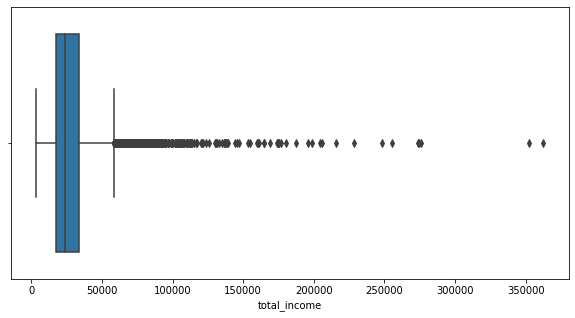

In [68]:
#create boxplot
plt.figure(figsize=(10,5))
sns.boxplot(total_income_clean['total_income']);

From the data visualization above, it can be seen that there are many outliers from the `total_income` data thus we can change the missing data with median.

Outlier values can be seen from the points that are outside the box line.

In [69]:
credit_scoring.loc[credit_scoring['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
12,0,NaN,65.0,secondary education,1,married,1,M,retiree,0,NaN,wedding,NaN,50,elderly
26,0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,NaN,education,NaN,26,adult
29,0,NaN,63.0,secondary education,1,single,4,F,retiree,0,NaN,house,NaN,48,adult
41,0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,NaN,cars,NaN,35,adult
55,0,NaN,54.0,secondary education,1,married,1,F,retiree,1,NaN,wedding,NaN,39,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21463,1,NaN,35.0,bachelor's degree,0,married,1,M,employee,0,NaN,wedding,NaN,20,adult
21489,2,NaN,47.0,secondary education,1,married,0,M,business,0,NaN,cars,NaN,32,adult
21495,1,NaN,50.0,secondary education,1,married,1,F,employee,0,NaN,wedding,NaN,35,adult
21497,0,NaN,48.0,bachelor's degree,0,married,0,F,business,0,NaN,house,NaN,33,adult


In [70]:
#make a function to fill the missing value on 'total_income'
def fill_missing_value (credit_scoring, age_group, total_income):
    grouped_values = credit_scoring.groupby('age_group')['total_income'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['age_group'][i]
        value = grouped_values['total_income'][i]
        credit_scoring.loc[(credit_scoring['age_group']==group) & (credit_scoring['total_income'].isna()), 'total_income'] = value
    return credit_scoring
credit_scoring = fill_missing_value(credit_scoring, 'age_group', 'total_income')

In [71]:
#check the missing value
credit_scoring['total_income'].isna().sum()

0

In [72]:
#check the missing value
credit_scoring.loc[credit_scoring['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group


**3.2. Fixed `days_employed` missing value**

Fixing missing values in the `days_employed` column can be started by looking at the distribution of existing data and outliers.

In [73]:
credit_scoring.loc[credit_scoring['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
12,0,NaN,65.0,secondary education,1,married,1,M,retiree,0,25190.741,wedding,NaN,50,elderly
26,0,NaN,41.0,secondary education,1,married,0,M,civil servant,0,24170.976,education,NaN,26,adult
29,0,NaN,63.0,secondary education,1,single,4,F,retiree,0,24170.976,house,NaN,48,adult
41,0,NaN,50.0,secondary education,1,married,0,F,civil servant,0,24170.976,cars,NaN,35,adult
55,0,NaN,54.0,secondary education,1,married,1,F,retiree,1,24170.976,wedding,NaN,39,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21463,1,NaN,35.0,bachelor's degree,0,married,1,M,employee,0,24170.976,wedding,NaN,20,adult
21489,2,NaN,47.0,secondary education,1,married,0,M,business,0,24170.976,cars,NaN,32,adult
21495,1,NaN,50.0,secondary education,1,married,1,F,employee,0,24170.976,wedding,NaN,35,adult
21497,0,NaN,48.0,bachelor's degree,0,married,0,F,business,0,24170.976,house,NaN,33,adult


In [74]:
days_employed_clean = credit_scoring.loc[~credit_scoring['days_employed'].isna()]
days_employed_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult


In [75]:
#calculating mean and median from 'days_employed'
days_age_group_pivot = pd.pivot_table(days_employed_clean,
                       index=['age_group'],
                       values=['total_income'],
                       aggfunc=['median', 'mean'])
days_age_group_pivot

,median,mean
,total_income,total_income
age_group,,
adult,24170.976,27852.58832
elderly,25190.741,28096.00259


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


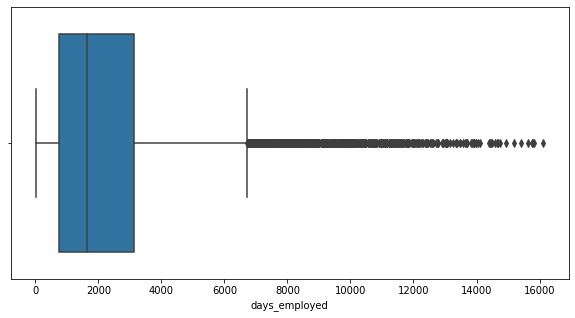

In [76]:
#see the outlier
plt.figure(figsize=(10,5))
sns.boxplot(days_employed_clean['days_employed']);

From the data above, it can be seen that there are many outliers in the `days_employed` data. So the decision taken is to fill in null data with the median.

In [77]:
#make a function to fill the value
def fill_missing_value (credit_scoring, age_group, days_employed):
    grouped_values = credit_scoring.groupby('age_group')['days_employed'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['age_group'][i]
        value = grouped_values['days_employed'][i]
        credit_scoring.loc[(credit_scoring['age_group']==group) & (credit_scoring['days_employed'].isna()), 'days_employed'] = value
    return credit_scoring
credit_scoring = fill_missing_value(credit_scoring, 'age_group', 'days_employed')

In [78]:
#check the missing value
credit_scoring['days_employed'].isna().sum()

0

In [79]:
#check the missing value
credit_scoring.loc[credit_scoring['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group


In [80]:
#check the info as the missing value is filled
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17556 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           17556 non-null  int64  
 1   days_employed      17556 non-null  float64
 2   dob_years          17556 non-null  float64
 3   education          17556 non-null  object 
 4   education_id       17556 non-null  int64  
 5   family_status      17556 non-null  object 
 6   family_status_id   17556 non-null  int64  
 7   gender             17556 non-null  object 
 8   income_type        17556 non-null  object 
 9   debt               17556 non-null  int64  
 10  total_income       17556 non-null  float64
 11  purpose            17556 non-null  object 
 12  years_employed     15787 non-null  float64
 13  max_working_years  17556 non-null  int64  
 14  age_group          17556 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 2.1+ MB


The `years_employed` column still has missing value. We can use the same method as `days_employed` and `total_income`.

In [81]:
#make years_employed data clean as new dataset
years_employed_clean = credit_scoring.loc[~credit_scoring['years_employed'].isna()]
years_employed_clean.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult


In [82]:
#calculating mean and median from 'years_employed'
years_employed_pivot = pd.pivot_table(days_employed_clean,
                       index=['age_group'],
                       values=['years_employed'],
                       aggfunc=['median', 'mean'])
years_employed_pivot

,median,mean
,years_employed,years_employed
age_group,,
adult,4.44,6.352281
elderly,7.88,10.987350


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


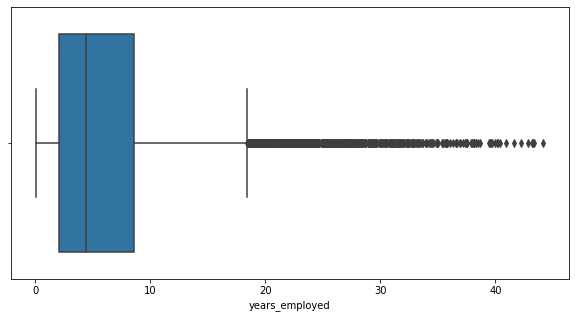

In [83]:
#see the outlier
plt.figure(figsize=(10,5))
sns.boxplot(years_employed_clean['years_employed']);

There are some outlier in the data, so the missing value is filled with median.

In [84]:
#make a function to fill the value
def fill_missing_value (credit_scoring, age_group, years_employed):
    grouped_values = credit_scoring.groupby('age_group')['years_employed'].median().reset_index()
    size = len(grouped_values)
    for i in range(size):
        group = grouped_values['age_group'][i]
        value = grouped_values['years_employed'][i]
        credit_scoring.loc[(credit_scoring['age_group']==group) & (credit_scoring['years_employed'].isna()), 'years_employed'] = value
    return credit_scoring
credit_scoring = fill_missing_value(credit_scoring, 'age_group', 'years_employed')

In [85]:
#check the missing value
credit_scoring['years_employed'].isna().sum()

0

In [86]:
#check the missing value
credit_scoring.loc[credit_scoring['years_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group


In [87]:
#check the info as the missing value is filled
credit_scoring.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17556 entries, 0 to 21524
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   children           17556 non-null  int64  
 1   days_employed      17556 non-null  float64
 2   dob_years          17556 non-null  float64
 3   education          17556 non-null  object 
 4   education_id       17556 non-null  int64  
 5   family_status      17556 non-null  object 
 6   family_status_id   17556 non-null  int64  
 7   gender             17556 non-null  object 
 8   income_type        17556 non-null  object 
 9   debt               17556 non-null  int64  
 10  total_income       17556 non-null  float64
 11  purpose            17556 non-null  object 
 12  years_employed     17556 non-null  float64
 13  max_working_years  17556 non-null  int64  
 14  age_group          17556 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 2.1+ MB


From the data above, it can be concluded that all null values have been filled in because each column has the same number of entries.

# Data Categorization

The process of categorizing data is useful to make it easier for users to read the data to be submitted. In the `credit_scoring` dataframe several columns can be categorized. The columns to be categorized are `dob_years` (already done), `years_employed`, and `total_income` columns.

The first column to be categorized is the `years_employed` column. Column `years_employed` can be categorized as follows=
1. If the number of years <= 3 years, then it is included in the category of `new employee`
2. If the number of years > 3 years, then it is included in the category of `old employee`

This range is obtained based on the theory derived from the book Personnel Management and Human Resources. This book was written by Handoko, H in 2010 and published by BPFE UGM, Jogjakarta.

In [88]:
#make a function to categorize 'years_employed'
def years_employed_cat(years):
  try:
    if years <= 3:
      a = 'new employee'
    elif years > 3:
      a = 'old employee'
    return a
  except:
    return 'unidentified'

In [89]:
#see if the fuction is okay
years_employed_cat(47)

'old employee'

In [90]:
#create a new column for the data
credit_scoring['years_employed_cat'] = credit_scoring['years_employed'].apply(years_employed_cat)

In [91]:
#see if the code is running well
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group,years_employed_cat
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult,old employee
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult,old employee
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult,old employee
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult,old employee
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult,new employee


In [92]:
#check per category
credit_scoring['years_employed_cat'].value_counts()

old employee    11847
new employee     5709
Name: years_employed_cat, dtype: int64

The second column is `total_income`.

This column is organized based on analysis conducted in America. This is because the data from the `total_income` column has a value in dollars so it makes more sense to use the categorization from US.

Column `total_income` will be divided into:
1. If `total_income` <= 32,048 belongs to the `poor` group
2. If `total_income` amounts to 32,048 < x <= 53,413 including the `lower-middle class` group
3. If `total_income` amounts to 53,413 < x <= 106,827 including the `middle class` group
4. If `total_income` amounts to 106,827 < x <= 373,894 including the `upper-middle class` group
5. If `total_income` amounts to > 373,894 including the `rich`  group

In [93]:
#make a function for categorization
def total_income_cat(income):
  try:
    if income <= 32048:
      a = 'poor'
    elif 32048 < income <= 53413:
      a = 'lower-middle class'
    elif 53413 < income <= 106827 :
      a = 'middle class'
    elif 106827 < income <= 373894:
      a = 'upper-middle class'
    elif income > 373894:
      a = 'rich'
    return a
  except:
    return 'unidentified'

In [94]:
#check the function
total_income_cat(3682829)

'rich'

In [95]:
#make a new column for total income category
credit_scoring['total_income_cat'] = credit_scoring['total_income'].apply(total_income_cat)

In [96]:
#see if the function run well 
credit_scoring.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,max_working_years,age_group,years_employed_cat,total_income_cat
0,1,8438.0,42.0,bachelor's degree,0,married,0,F,employee,0,40620.102,house,23.12,27,adult,old employee,lower-middle class
1,1,4025.0,36.0,secondary education,1,married,0,F,employee,0,17932.802,cars,11.03,21,adult,old employee,poor
2,0,5623.0,33.0,secondary education,1,married,0,M,employee,0,23341.752,house,15.41,18,adult,old employee,poor
3,3,4125.0,32.0,secondary education,1,married,0,M,employee,0,42820.568,education,11.30,17,adult,old employee,lower-middle class
5,0,926.0,27.0,bachelor's degree,0,married,1,M,business,0,40922.170,house,2.54,12,adult,new employee,lower-middle class


In [97]:
#check the mean and median from total_income by their category
total_income_pivot = pd.pivot_table(credit_scoring,
                       index = ['total_income_cat'],
                       values = ['total_income'],
                       aggfunc = ['median', 'mean'])
total_income_pivot

,median,mean
,total_income,total_income
total_income_cat,,
lower-middle class,38920.9525,39942.444382
middle class,63167.9350,66753.300063
poor,21802.1680,20812.786369
upper-middle class,136538.8490,154495.375247


In [98]:
#check the distribution of the data
round(credit_scoring['total_income_cat'].value_counts(normalize=True)*100, 2)

poor                  74.58
lower-middle class    20.03
middle class           4.98
upper-middle class     0.42
Name: total_income_cat, dtype: float64

# **Checking Hypotheses**

**Is there a correlation between having children and paying off on time?**

The first hypothesis is that the fewer children a customer has, the higher the probability that the customer will repay on time. This is due to the fewer responsibilities of these customers.

In [99]:
#check the hypothesis
first_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = ['children'],
                       values = ['debt'],
                       aggfunc = ['sum'])
first_hipotesis_pivot

,sum
,debt
children,
0,890
1,430
2,199
3,26
4,4
5,0


**Conclusion**

The `debt` column has a value of 0 or 1. A value of 0 explains that the customer is never late in paying and a value of 1 is otherwise. So, based on the data above, it can be concluded that 890 customers who do not have children pay late. While the highest number of children owned by customers, namely 5, was never late in paying.

The conclusion obtained is that the initial hypothesis is rejected. The relationship between the number of children and timely repayment is that the more children, the greater the opportunity to make payments on time.

**Is there a correlation between family status and paying off on time?**

The initial hypothesis is that if a customer is single, the higher the probability of paying off on time.

In [100]:
#check the second hypothesis
second_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = ['family_status'],
                       values = ['debt'],
                       aggfunc = ['sum'])
second_hipotesis_pivot

,sum
,debt
family_status,
married,1183
single,366


**Conclusion**

From the data above, it can be concluded that the initial hypothesis is accepted. It is shown that the lowest value of customers who have debts is a single and the highest is a customer who is married. So it can be concluded that there is a relationship between family status and timely repayment.

**Is there a correlation between income levels and paying back on time?**

The initial hypothesis regarding this question is that the higher a person's income, the higher the probability that the customer will pay on time.

In [101]:
#check the third hypothesis
third_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = ['total_income_cat'],
                       values = ['debt'],
                       aggfunc = ['sum'])
third_hipotesis_pivot

,sum
,debt
total_income_cat,
lower-middle class,255
middle class,64
poor,1225
upper-middle class,5


**Conclusion**

From the data above, it can be seen that the initial hypothesis is accepted. Customers with the `poor` economic class have the most cases of late paying while customers with the `upper middle class` economy have the lowest late payment cases. So it can be concluded that there is a relationship between the level of income with timely repayment.

**How do credit purpose affect their payment?**

In [102]:
#check fourth hypothesis
fourth_hipotesis_pivot = pd.pivot_table(credit_scoring,
                       index = ['purpose'],
                       values = ['debt'],
                       aggfunc = ['sum'])
fourth_hipotesis_pivot

,sum
,debt
purpose,
cars,356
education,328
house,700
wedding,165


**Conclusion**

The purpose of credit with the highest late payment cases is `house`. This can be caused by high house prices so that the loan amount is large. If the loan amount taken by the customer is too large and does not match the income received, the possibility of default is higher. Large loans also affect the interest charged by the bank, so there is a possibility of default for customers who take large loan amounts.

This theory is also supported by the results of the analysis of the lowest credit objective, namely for `wedding`. Most weddings cost no more than buying a car, house, or education. So that the loan taken by the customer is not too large and the possibility of default is smaller.

# **General Conclusion**

The current data analysis process is used as a reference for conducting credit assessments and customer creditworthiness. The analysis process begins with identifying and filling in the missing values. There are some missing values ​​in some of the columns. The missing values ​​are filled in based on the presence of outliers or deviant values. The data in the `days_employed` and `total_income` including `dob_years` columns have deviated values ​​so that the missing data is filled in using `median()`.

In addition, the data is analyzed to see values ​​that do not make sense. As in `days_employed` has a negative day value and after converting to years the value doesn't make sense. Thus, to prevent errors in data analysis, values ​​that do not make sense are dropped because there is no evidence that the data entered is a typo/input.

After all data is filled in, duplicate data is also removed because it will affect the analysis and conclusion-making process.

The overall conclusion for the customer's credit rating is=
1. The more children a customer has, the customer tends to be on time to pay
2. If the customer status is single/single, then the customer tends to be on time to pay
3. The higher the customer's income, the more likely it is to be on time to pay
4. The smaller the customer's loan, which can be determined from the purpose of the loan, the customer tends to be on time to pay